In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import graphviz
data=pd.read_csv('titanic.csv')
data
import numpy as np

In [3]:
data['age'].fillna(data['age'].mean(),inplace=True)
encoder = LabelEncoder()
data.drop(['ticket','cabin','embarked','body','boat','home.dest'],inplace=True,axis=1)
data.dropna(how='any',inplace=True)
data['sex'] = encoder.fit_transform(data['sex'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   float64
 1   survived  1308 non-null   float64
 2   name      1308 non-null   object 
 3   sex       1308 non-null   int64  
 4   age       1308 non-null   float64
 5   sibsp     1308 non-null   float64
 6   parch     1308 non-null   float64
 7   fare      1308 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 92.0+ KB


In [5]:
x=data[	['pclass','sex',	'age',	'sibsp'	,'parch','fare']]
y = data[['survived']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=40)

#applying tree algorithm
tree_decision = tree.DecisionTreeClassifier()  
tree_decision.fit(x_train, y_train)   #fitting our model
y_pred=tree_decision.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7480916030534351


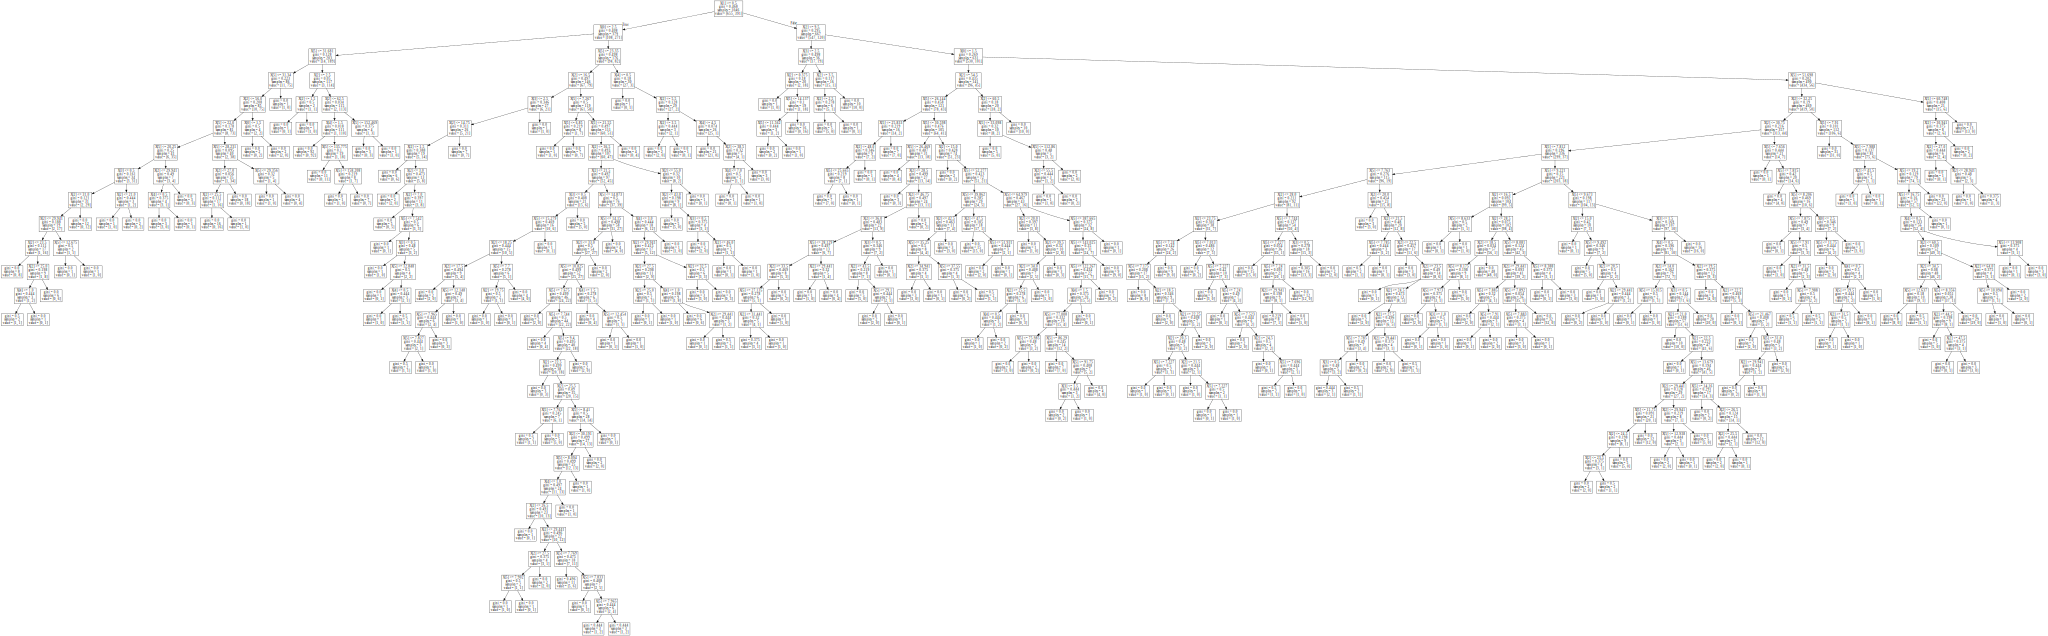

In [6]:
plotted = tree.export_graphviz(tree_decision, out_file = None)
graph = graphviz.Source(plotted)
graph.render("data")
graph

In [7]:
tree_decision = tree.DecisionTreeClassifier(criterion="gini",splitter='best',max_leaf_nodes=5)  
tree_decision.fit(x_train, y_train)   #fitting our model
y_pred=tree_decision.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8015267175572519


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
random_grid = {'n_estimators': n_estimators,}
param_grid = {
    
    'n_estimators': [100, 200, 300, 1000]
}


In [14]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 100}

In [15]:
clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", accuracy_score(y_test, y_pred)) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.7900763358778626
